# Scraping Armenian data using `pd.read_html()`

[pd.read_html()](https://pandas.pydata.org/docs/reference/api/pandas.read_html.html#pandas.read_html) reads html tables in specified web page into a list.

Useful parameters for `pd.read_html()` include: `attrs`, `parse_dates`, `thousands`, `encoding`, `decimal`, `match` and `converters`.

In [1]:
import os, sys
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize
import regex as re

PAGE = "https://hyw.wikipedia.org/wiki/%D5%80%D5%A1%D5%B5%D5%A1%D5%BD%D5%BF%D5%A1%D5%B6%D5%AB_%D5%80%D5%A1%D5%B6%D6%80%D5%A1%D5%BA%D5%A5%D5%BF%D5%B8%D6%82%D5%A9%D5%A5%D5%A1%D5%B6_%D4%B2%D5%B6%D5%A1%D5%AF%D5%B9%D5%B8%D6%82%D5%A9%D5%AB%D6%82%D5%B6"

In [2]:
# Since the table has no id attribute, use table caption to target specific table in webpage
caption = 'Հայաստանի բնակչութեան բնական շարժը 1915-2011 թուականներուն'
table = pd.read_html(PAGE, match=caption, encoding="utf-8", thousands="", decimal=",", header=2, parse_dates=['Տարիները'])



In [3]:
# if only one table in result set, define df, otherwise exit
df = None
if len(table) == 1:
    df = table[0]
if df is None:
    exit(1)

df['Տարիները'] = pd.to_datetime(df['Տարիները']).dt.year
# last row is garbage data, remove last row
# df = df[:-1]
# Copy dataframe
df_new = df.copy()
df_new.head(5)

,Տարիները,Ծնունթներու թիւը,Մահացածներու թիւը,"Բնական աճը, %"
0,1915,46.3,23.9,22.4
1,1925,51.5,16.2,35.3
2,1926,56.0,17.0,39.0
3,1940,41.2,13.8,27.4
4,1950,32.1,8.5,23.6


In [4]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Տարիները           19 non-null     int64  
 1   Ծնունթներու թիւը   19 non-null     float64
 2   Մահացածներու թիւը  19 non-null     float64
 3   Բնական աճը, %      19 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 736.0 bytes


In [5]:
# https://towardsdatascience.com/all-pandas-read-html-you-should-know-for-scraping-data-from-html-tables-a3cbb5ce8274
# https://www.regular-expressions.info/unicode.html
# https://towardsdatascience.com/simplify-your-dataset-cleaning-with-pandas-75951b23568e
# https://dataindependent.com/pandas/pandas-change-column-names-3-methods/
# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
# https://towardsdatascience.com/how-to-clean-messy-pandas-column-names-20dc7400cea7
# https://www.dataquest.io/blog/regular-expressions-data-scientists/
# https://towardsdatascience.com/simplify-your-dataset-cleaning-with-pandas-75951b23568e
# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas

# 
# clean_labels(string)
#    Regular expression patterns to clean up dataframe column labels
#    Usage: df.rename(columns=clean_labels, inplace=True)
#           df_new.rename(clean_labels, axis=1, inplace=True)
#
#   Required packages: regex
#
def clean_labels(s):
    #s = re.sub(r'[\p{Pd}\p{Ps}\p{Pe}\p{Pi}\p{Pf}\p{Po}]+','',s) # Remove punction, except \p{Pc}
    s = re.sub(r'[\p{P}±]+', '', s) # Strip punctuation
    s = re.sub(r'\p{Z}+', '_', s) # Replacea sequence of whitespace characters with a single underscore..
    s = re.sub(r'^_|_$', '', s) # remove string initial or final underscores
    return s

#df_new.rename(columns=clean_labels, inplace=True)
df_new.rename(clean_labels, axis=1, inplace=True)
df_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Տարիները           19 non-null     int64  
 1   Ծնունթներու_թիւը   19 non-null     float64
 2   Մահացածներու_թիւը  19 non-null     float64
 3   Բնական_աճը         19 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 736.0 bytes


In [6]:
clean_labels("±% năm")

'năm'

<AxesSubplot:xlabel='Տարիները'>

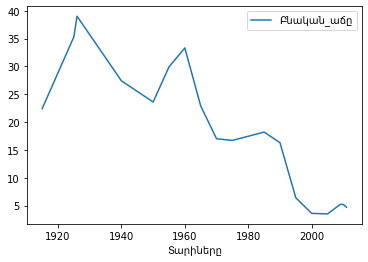

In [7]:
import matplotlib.pyplot as plt
df_new.plot(x='Տարիները', y="Բնական_աճը")
